In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [8]:
in_data_dir = Path('../data/full_singlerank_05_12_2020')

In [9]:
kwds_loc = in_data_dir / 'kwds.jsonl'

In [10]:
chunks = pd.read_json(kwds_loc, orient='records', lines=True, chunksize=1000)

In [11]:
df = pd.DataFrame()
for c in tqdm(chunks):
    df = pd.concat([df, c['bibstem']])

In [12]:
df.columns = ['bibstem']

In [13]:
counts = df['bibstem'].apply(lambda x: x[0]).value_counts()

In [14]:
n_journals = len(counts.index.unique())

In [23]:
counts.to_csv('journal_counts.csv')

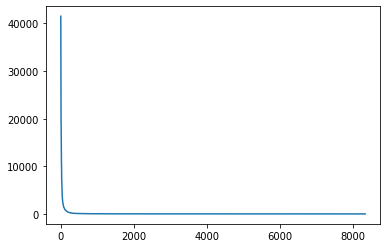

In [15]:
plt.plot(range(len(counts)), counts)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

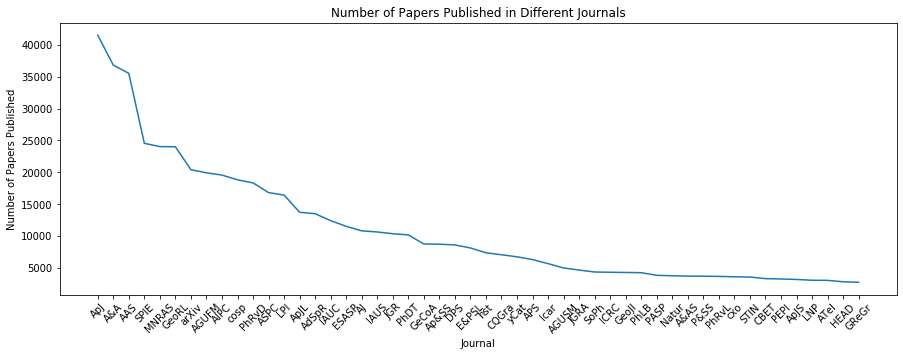

In [16]:
t = 50
plt.figure(figsize=(15, 5))
plt.plot(counts.index[0:t], counts.iloc[0:t])
plt.title('Number of Papers Published in Different Journals')
plt.xlabel('Journal')
plt.ylabel('Number of Papers Published')
plt.xticks(rotation=45)

In [17]:
counts.index

Index(['ApJ', 'A&A', 'AAS', 'SPIE', 'MNRAS', 'GeoRL', 'arXiv', 'AGUFM', 'AIPC',
       'cosp',
       ...
       'EPJAP', 'lbas', 'kmog', 'itoc', 'ebu5', 'init', 'ezuk', 'APPBS',
       'fmci', 'sgnp'],
      dtype='object', length=8325)

In [18]:
from pywikiapi import wikipedia

site = wikipedia('en')
jl = 100
t = 10
pages = []
for c in tqdm(counts.index[0:jl]):
    i = 0
    for p in site.query(list='search', srsearch=c):
        for r in p['search']:
            if ' journal ' in r['snippet'].lower():
                pages.append(r)
                break
            elif i > t:
                pages.append(None)
                break
            else:
                continue
        else:
            i += 1
            continue
        break

KeyboardInterrupt: 

In [20]:
pages[5]